# **Extraction of ROI**

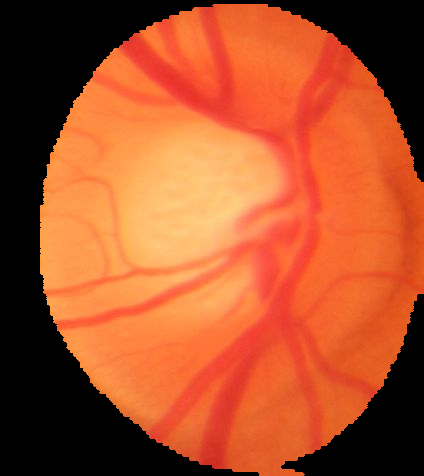

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the input image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_Cropped/normal/09_h_result.jpg')

# Load the mask image
mask = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation/normal/09_h_result_mask.png')

# Check if the images were loaded successfully
if img is None:
    print("Error loading image")
    exit()
if mask is None:
    print("Error loading mask image")
    exit()

# Convert the mask image to grayscale
mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# Resize the mask image to match the size of the input image
mask_resized = cv2.resize(mask_gray, (img.shape[1], img.shape[0]))

# Convert the mask image to the appropriate data type
mask_resized = mask_resized.astype(np.uint8)

# Apply the bitwise AND operation using the mask image and the input image
result = cv2.bitwise_and(img, img, mask=mask_resized)

# Display the result
cv2_imshow(result)

# Wait for a key press to exit
cv2.waitKey(0)

# Close all open windows
cv2.destroyAllWindows()


To crop the black area from the result image, you can follow these steps:

Find the bounding box coordinates of the non-black pixels in the result image. Crop the result image based on the bounding box coordinates. Here's the modified code to accomplish this:

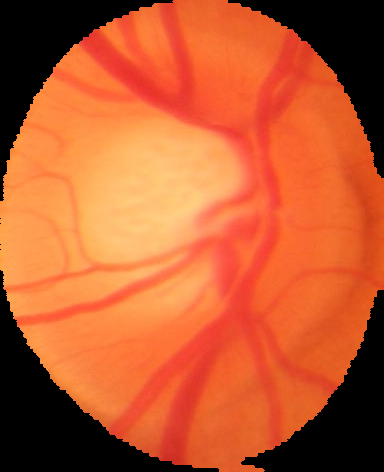

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the input image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_Cropped/normal/09_h_result.jpg')

# Load the mask image
mask = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation/normal/09_h_result_mask.png')

# Check if the images were loaded successfully
if img is None:
    print("Error loading image")
    exit()
if mask is None:
    print("Error loading mask image")
    exit()

# Convert the mask image to grayscale
mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# Resize the mask image to match the size of the input image
mask_resized = cv2.resize(mask_gray, (img.shape[1], img.shape[0]))

# Convert the mask image to the appropriate data type
mask_resized = mask_resized.astype(np.uint8)

# Apply the bitwise AND operation using the mask image and the input image
result = cv2.bitwise_and(img, img, mask=mask_resized)

# Find contours in the resulting image
contours, _ = cv2.findContours(mask_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding box of the largest contour
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the black area from the resulting image
cropped_result = result[y:y+h, x:x+w]

# Display the cropped result
cv2_imshow(cropped_result)

# Wait for a key press to exit
cv2.waitKey(0)

# Close all open windows
cv2.destroyAllWindows()


In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import os

# Define the paths of the images and masks
image_dir = '/content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_Cropped/glaucoma/'
mask_dir = '/content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation/glaucoma/'
output_dir = '/content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation_and_ROI/glaucoma/'

# Get the list of image and mask paths and sort them
image_paths = sorted([os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')])
mask_paths = sorted([os.path.join(mask_dir, file) for file in os.listdir(mask_dir) if file.endswith('.png')])

# Iterate over the sorted image and mask paths
for image_path, mask_path in zip(image_paths, mask_paths):
    # Load the image and mask
    img = cv2.imread(image_path)
    mask = cv2.imread(mask_path)

    # Check if the images were loaded successfully
    if img is None:
        print("Error loading image:", image_path)
        continue
    if mask is None:
        print("Error loading mask image:", mask_path)
        continue

    # Convert the mask image to grayscale
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # Resize the mask image to match the size of the input image
    mask_resized = cv2.resize(mask_gray, (img.shape[1], img.shape[0]))

    # Convert the mask image to the appropriate data type
    mask_resized = mask_resized.astype(np.uint8)

    # Apply the bitwise AND operation using the mask image and the input image
    result = cv2.bitwise_and(img, img, mask=mask_resized)

    # Find contours in the resulting image
    contours, _ = cv2.findContours(mask_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the bounding box of the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Crop the black area from the resulting image
    cropped_result = result[y:y+h, x:x+w]

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Save the cropped result to a new path
    output_path = os.path.join(output_dir, os.path.basename(image_path))
    cv2.imwrite(output_path, cropped_result)

    print("Saved cropped image:", output_path)


Saved cropped image: /content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation_and_ROI/glaucoma/01_g_result.jpg
Saved cropped image: /content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation_and_ROI/glaucoma/02_g_result.jpg
Saved cropped image: /content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation_and_ROI/glaucoma/03_g_result.jpg
Saved cropped image: /content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation_and_ROI/glaucoma/04_g_result.jpg
Saved cropped image: /content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation_and_ROI/glaucoma/05_g_result.jpg
Saved cropped image: /content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation_and_ROI/glaucoma/06_g_result.jpg
Saved cropped image: /content/drive/MyDrive/Colab Notebook

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import os

# Define the paths of the images and masks
image_dir = '/content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_Cropped/normal/'
mask_dir = '/content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation/normal/'
output_dir = '/content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation_and_ROI/normal/'

# Get the list of image and mask paths and sort them
image_paths = sorted([os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')])
mask_paths = sorted([os.path.join(mask_dir, file) for file in os.listdir(mask_dir) if file.endswith('.png')])

# Iterate over the sorted image and mask paths
for image_path, mask_path in zip(image_paths, mask_paths):
    # Load the image and mask
    img = cv2.imread(image_path)
    mask = cv2.imread(mask_path)

    # Check if the images were loaded successfully
    if img is None:
        print("Error loading image:", image_path)
        continue
    if mask is None:
        print("Error loading mask image:", mask_path)
        continue

    # Convert the mask image to grayscale
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # Resize the mask image to match the size of the input image
    mask_resized = cv2.resize(mask_gray, (img.shape[1], img.shape[0]))

    # Convert the mask image to the appropriate data type
    mask_resized = mask_resized.astype(np.uint8)

    # Apply the bitwise AND operation using the mask image and the input image
    result = cv2.bitwise_and(img, img, mask=mask_resized)

    # Find contours in the resulting image
    contours, _ = cv2.findContours(mask_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the bounding box of the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Crop the black area from the resulting image
    cropped_result = result[y:y+h, x:x+w]

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Save the cropped result to a new path
    output_path = os.path.join(output_dir, os.path.basename(image_path))
    cv2.imwrite(output_path, cropped_result)

    print("Saved cropped image:", output_path)


Saved cropped image: /content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation_and_ROI/normal/01_h_result.jpg
Saved cropped image: /content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation_and_ROI/normal/02_h_result.jpg
Saved cropped image: /content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation_and_ROI/normal/03_h_result.jpg
Saved cropped image: /content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation_and_ROI/normal/04_h_result.jpg
Saved cropped image: /content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation_and_ROI/normal/05_h_result.jpg
Saved cropped image: /content/drive/MyDrive/Colab Notebooks/Project Implementation/HRF_Data cleaning/HRF_after_segmentation_and_ROI/normal/06_h_result.jpg
Saved cropped image: /content/drive/MyDrive/Colab Notebooks/Project Im